# FINAL PROJECT: 

## Introduction

## Import Libraries

Install dan import libraries yang digunakan.

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib as mpl

%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE # Recursive Feature Selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error 

import warnings
warnings.filterwarnings("ignore")

In [6]:
mpl.style.use(['ggplot'])

## Data Loading

In [7]:
data = pd.read_csv('C:/Kuliah/Studi Independen/heart_failure.csv')
# data = pd.read_csv('E:/Cool Yeah/Hacktiv8/Final-Project_Kelompok4/Data/weatherAUS.csv')

Memanggil bagian kepala data.

In [8]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Memanggil bagian ekor data.

In [9]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


Mengecek dimensi data.

In [10]:
data.shape

(299, 13)

Dari hasil diatas terdapat 145.460 baris data dan 23 kolom data

Mengecek info dataset.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Mengecek tipe data apa saja yg ada pada variabel.

In [12]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

Terdapat 3 variabel bertipe float dan 10 variabel bertipe integer

Statistik Deskriptif.

In [13]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Mengecek atribut data.

In [14]:
data.anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [15]:
data.creatinine_phosphokinase.value_counts()

582     47
66       4
129      4
231      3
69       3
        ..
748      1
1876     1
936      1
292      1
2413     1
Name: creatinine_phosphokinase, Length: 208, dtype: int64

In [16]:
data.diabetes.value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [17]:
data.ejection_fraction.value_counts()

35    49
38    40
40    37
25    36
30    34
60    31
50    21
45    20
20    18
55     3
15     2
62     2
17     2
65     1
14     1
80     1
70     1
Name: ejection_fraction, dtype: int64

In [18]:
data.high_blood_pressure.value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [19]:
data.platelets.value_counts()

263358.03    25
221000.00     4
279000.00     4
271000.00     4
305000.00     4
             ..
227000.00     1
289000.00     1
300000.00     1
217000.00     1
742000.00     1
Name: platelets, Length: 176, dtype: int64

In [20]:
data.serum_creatinine.value_counts()

1.00    50
1.10    32
0.90    32
1.20    24
0.80    24
1.30    20
0.70    19
1.18    11
1.40     9
1.70     9
1.83     8
1.60     6
1.90     5
2.10     5
1.50     5
0.60     4
1.80     4
2.30     3
2.70     3
2.50     3
3.50     2
2.40     2
3.00     2
0.50     1
5.00     1
0.75     1
6.10     1
3.40     1
3.70     1
9.00     1
4.00     1
3.20     1
5.80     1
2.90     1
2.00     1
2.20     1
6.80     1
9.40     1
4.40     1
3.80     1
Name: serum_creatinine, dtype: int64

In [21]:
data.serum_sodium.value_counts()

136    40
137    38
140    35
134    32
138    23
139    22
135    16
132    14
141    12
142    11
133    10
145     9
130     9
144     5
131     5
127     3
143     3
128     2
129     2
121     1
116     1
146     1
126     1
124     1
113     1
125     1
148     1
Name: serum_sodium, dtype: int64

In [22]:
data.sex.value_counts()

1    194
0    105
Name: sex, dtype: int64

In [23]:
data.smoking.value_counts()

0    203
1     96
Name: smoking, dtype: int64

In [24]:
data.time.value_counts()

250    7
187    7
10     6
186    6
107    6
      ..
97     1
96     1
86     1
77     1
285    1
Name: time, Length: 148, dtype: int64

In [25]:
data.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [26]:
data['DEATH_EVENT'].value_counts()/len(data)

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

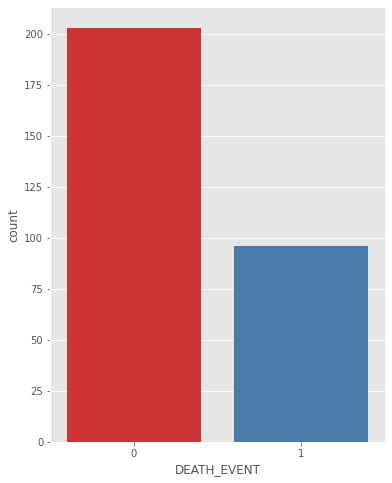

In [27]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="DEATH_EVENT", data=data, palette="Set1")
plt.show()

Target labels are 203 versus 96 thus there is an imbalance in the data.

Dari hasil diatas, pada variabel 'Rain Tomorrow' untuk atribut No muncul sebanyak 75.83 % kali dan atribut Yes sebesar 21.9% kali

## Data Cleaning

Mengecek jumlah data yang memiliki duplicate.

In [40]:
data.duplicated().sum()

0

Mengecek apakah masih terdapat data duplicated pada data dan hasilnya tidak ada.

In [41]:
data.duplicated().value_counts()

False    299
dtype: int64

### Mengisi Missing Value

In [42]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Data Exploration

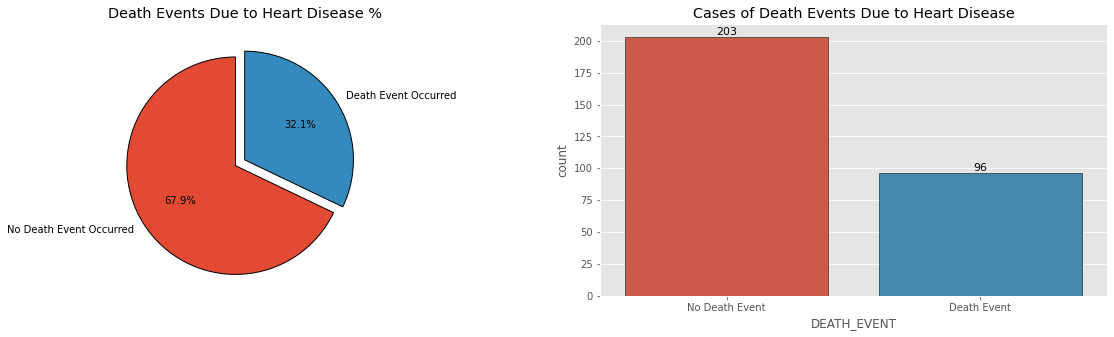

In [46]:
l = list(data['DEATH_EVENT'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Death Event Occurred','Death Event Occurred'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Death Events Due to Heart Disease %');

plt.subplot(1,2,2)
ax = sns.countplot('DEATH_EVENT',data = data, edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Death Event','Death Event'])
plt.title('Cases of Death Events Due to Heart Disease');
plt.show()

dari hasil plot di atas menunjukkan bahwa variabel 'No' memiliki 110316 data, dan variabel 'Yes' memiliki 31877 data.

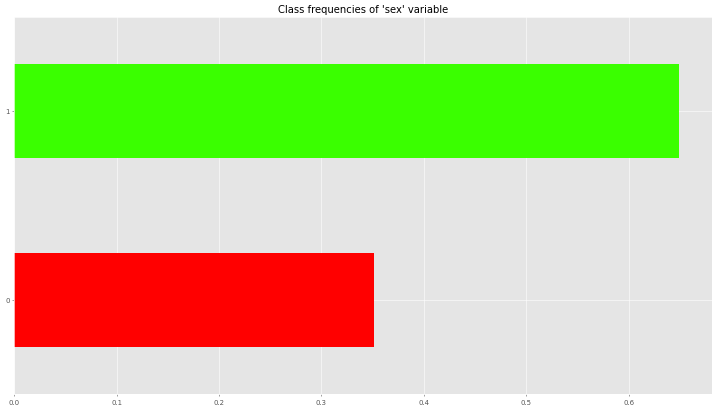

In [49]:
plt.figure(figsize = (18, 10), dpi = 50, edgecolor = "black")

(data["sex"].value_counts(ascending = True, normalize = True)
 .plot.barh(color= ["#FF0000", "#3AFF00"])
 .set_title("Class frequencies of 'sex' variable"));

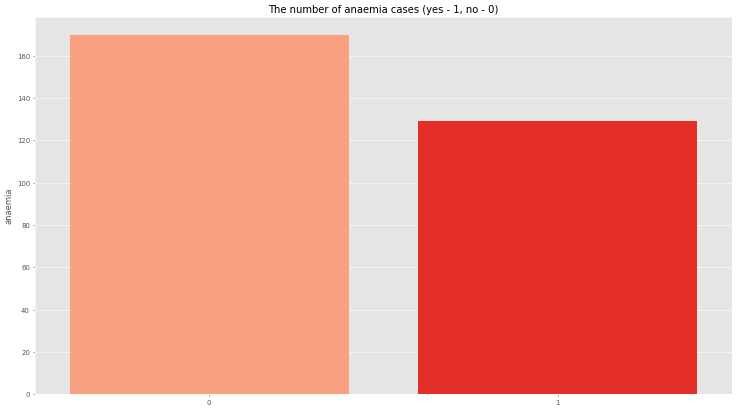

In [51]:
plt.figure(figsize = (18, 10), dpi = 50, edgecolor = "black")

sns.barplot(x = data["anaemia"].value_counts().index,
            y = data["anaemia"].value_counts(),
            data = data, palette = "Reds",
            saturation = 1).set(title = "The number of anaemia cases (yes - 1, no - 0)");

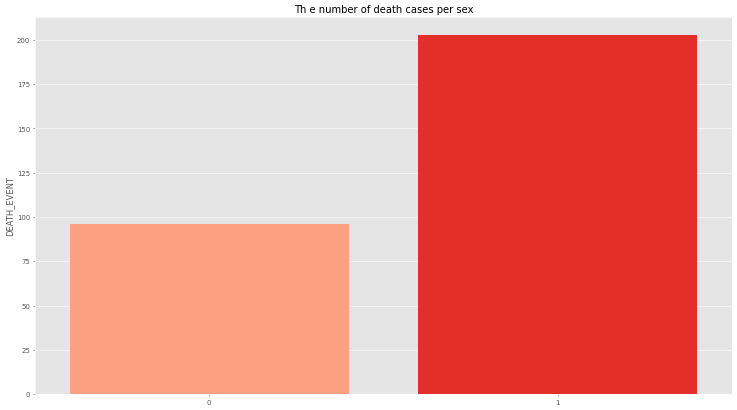

In [54]:
plt.figure(figsize = (18, 10), dpi = 50)

sns.barplot(x = data["sex"].value_counts().index,
            y = data["DEATH_EVENT"].value_counts(),
            data = data, palette = "Reds", 
            saturation = 1).set(title = "Th e number of death cases per sex");

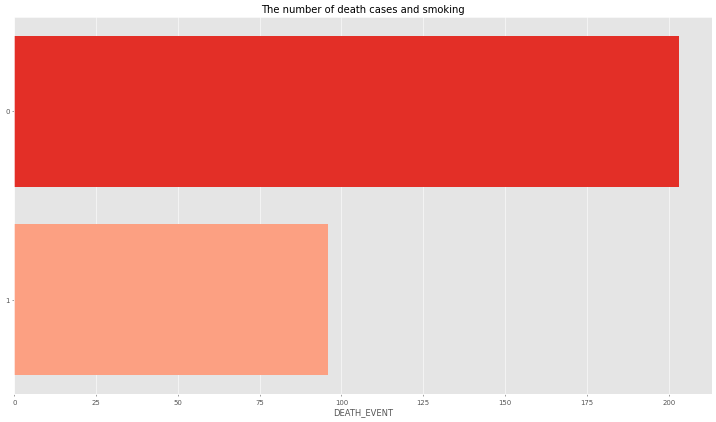

In [55]:
plt.figure(figsize = (18, 10), dpi = 50)

sns.barplot(y = data["smoking"].value_counts().index,
            x = data["DEATH_EVENT"].value_counts(),
            data = data, palette = "Reds_r", 
            saturation = 1,
            orient = "h").set(title = "The number of death cases and smoking");

Mengecek Outlier

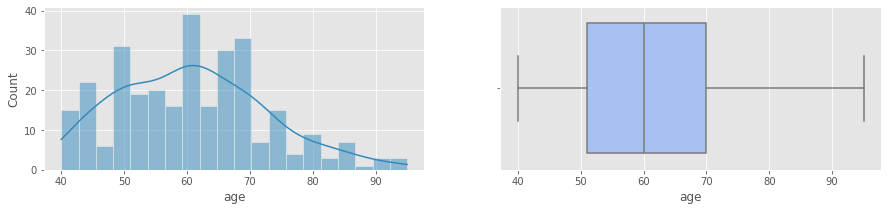

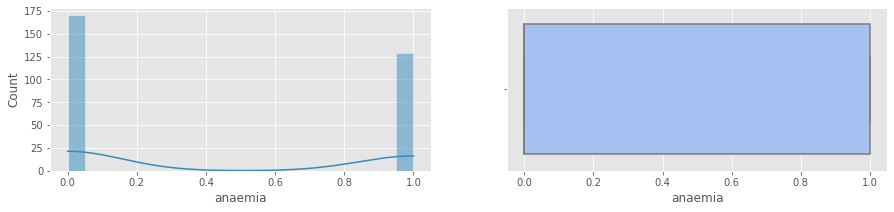

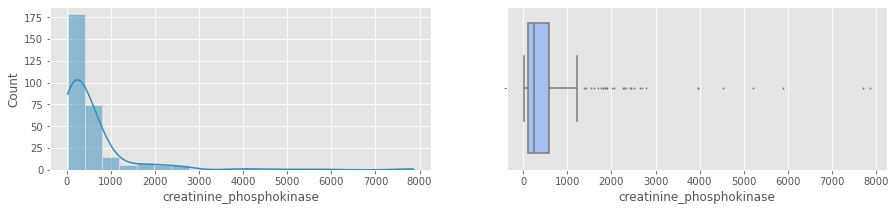

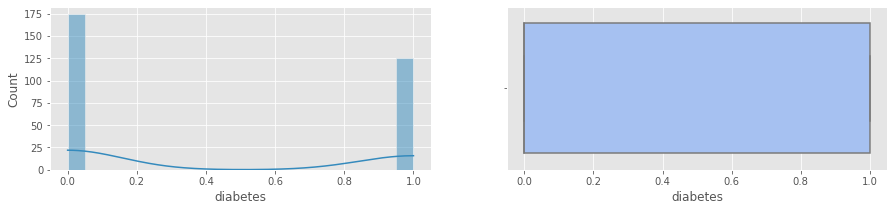

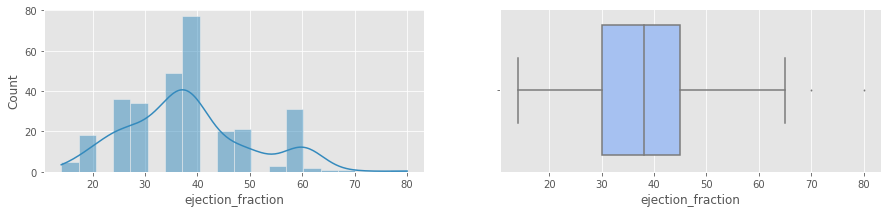

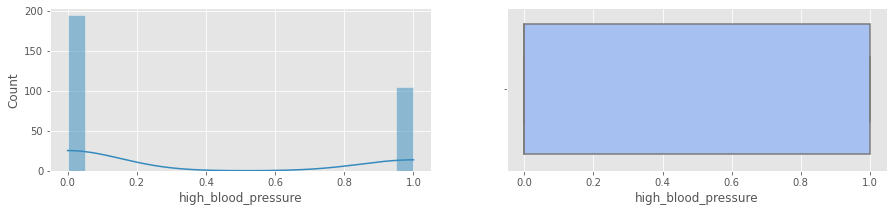

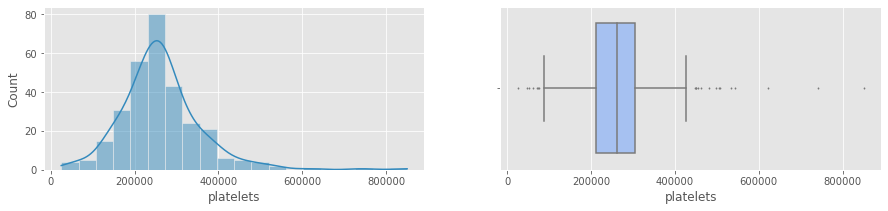

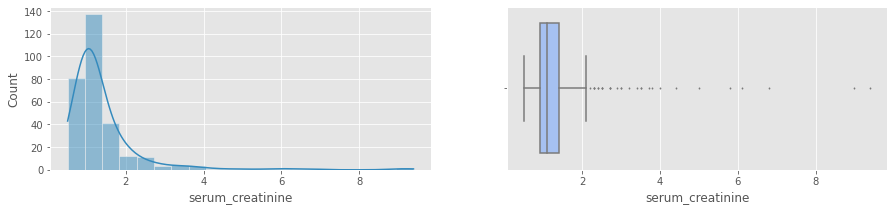

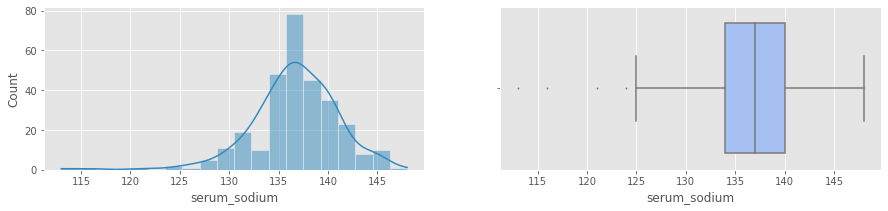

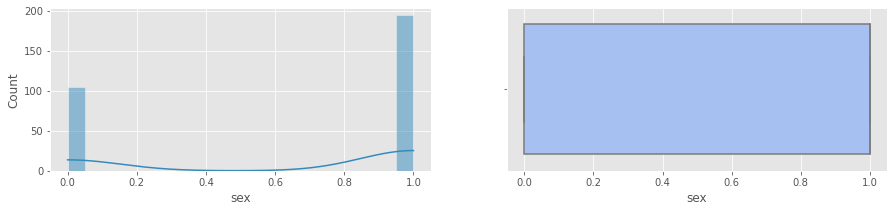

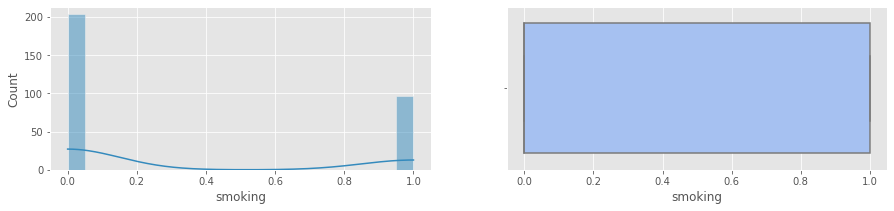

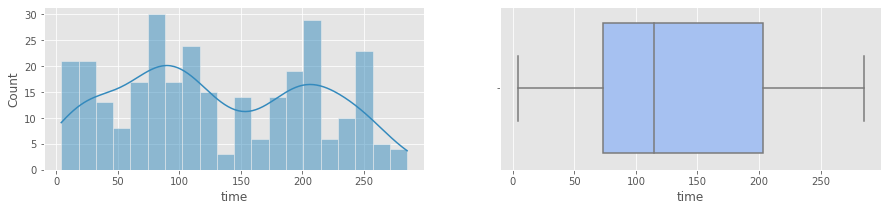

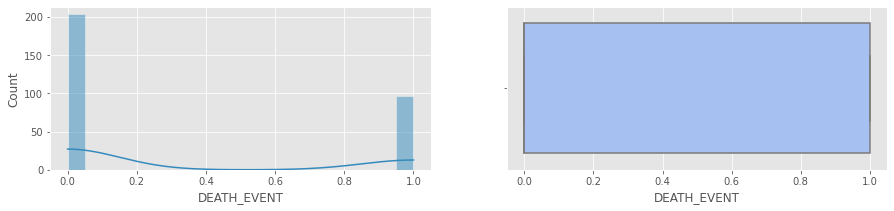

In [58]:
col = list(data.columns)
for i in col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(data[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(data[i], ax = axs[1], color='#99befd', fliersize=1);

Menampilkan Heatmap.

<AxesSubplot:>

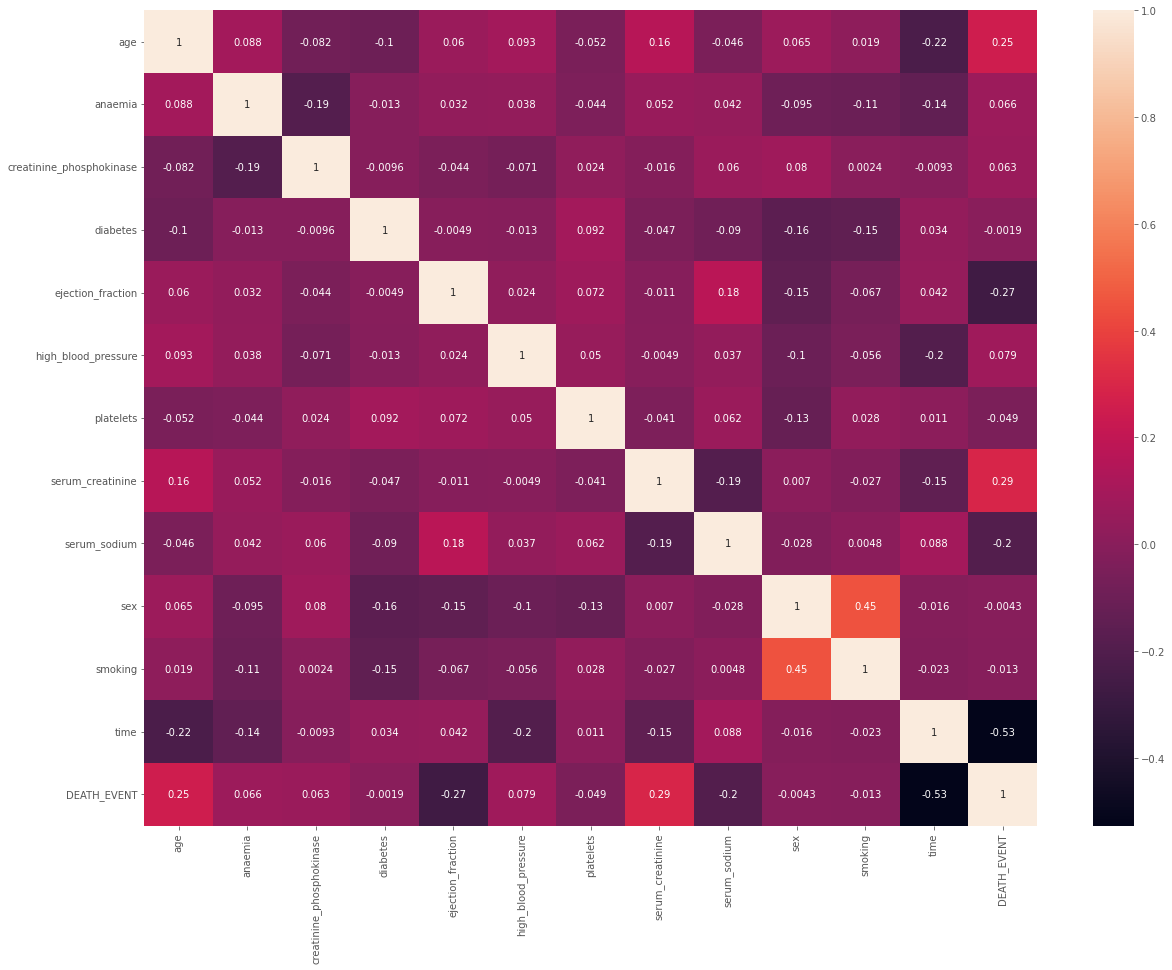

In [59]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)

Variabel yang memiliki korelasi yang erat dengan RainTomorrow adalah :
1. MinTemp dan Temp9am sangat berkorelasi.
2. MinTemp dan Temp3pm sangat berkorelasi.
3. MaxTemp dan Temp9am sangat berkorelasi.
4. MaxTemp dan Temp3pm sangat berkorelasi.
5. Temp3pm dan Temp9am sangat berkorelasi.
6. Humidity9am dan Humidity3pm sangat berkorelasi.

## Data Preprocessing

In [65]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

# Normalization
data['age'] = mms.fit_transform(data[['age']])
data['creatinine_phosphokinase'] = mms.fit_transform(data[['creatinine_phosphokinase']])
data['ejection_fraction'] = mms.fit_transform(data[['ejection_fraction']])
data['serum_creatinine'] = mms.fit_transform(data[['serum_creatinine']])
data['time'] = mms.fit_transform(data[['time']])

# Standardization
data['platelets'] = ss.fit_transform(data[['platelets']])
data['serum_sodium'] = ss.fit_transform(data[['serum_sodium']])
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0,0.071319,0,0.090909,1,1.681648e-02,0.157303,-1.504036,1,0,0.000000,1
1,0.272727,0,1.000000,0,0.363636,0,7.535660e-09,0.067416,-0.141976,1,0,0.007117,1
2,0.454545,0,0.015693,0,0.090909,0,-1.038073e+00,0.089888,-1.731046,1,1,0.010676,1
3,0.181818,1,0.011227,0,0.090909,0,-5.464741e-01,0.157303,0.085034,1,0,0.010676,1
4,0.454545,1,0.017479,1,0.090909,0,6.517986e-01,0.247191,-4.682176,0,0,0.014235,1


### Split Data

In [64]:
x=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

Menampilkan variabel X.

In [66]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


Menampilkan variabel Y.

In [67]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [69]:
from imblearn.over_sampling import SMOTE
oversampling = SMOTE(random_state = 0)
x_oversampling, y_oversampling = oversampling.fit_resample(x, y)

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_oversampling, y_oversampling, test_size=0.2, random_state=0)

Dalam hal ini dilakukan pemisahan data dengan ukuran data testing adalah 30% dan ukuran data training adalah 70%  yang diambil secara acak dengan nomor generator 1. Nomor ini menandakan nomor pengacakan agar jika di run kembali, pengacakan data akan tetap sama. Data training (X_train, Y_train) berguna untuk membangun model yang hasilnya akan digunakan untuk memprediksi X_test, kemudian hasil prediksinya dievaluasi dengan mengacu pada Y_test

In [71]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(324, 12)
(324,)
(82, 12)
(82,)


## Model Definition

## Model Training

### Random Forest

#### Create a model and fit it

In [73]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

#### Get results

In [75]:
print('train score : ', rf_model.score(x_train, y_train))

train score :  1.0


In [76]:
rf_train_pred = rf_model.predict(x_train)
accuracy = accuracy_score(y_train, rf_train_pred)
print('Training Accuracy: ',accuracy)

Training Accuracy:  1.0


### Gradient Boosting

#### Create a model and fit it

In [90]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier()
gbc_model.fit(x_train, y_train)

GradientBoostingClassifier()

#### Get results

In [91]:
print('train score : ', gbc_model.score(x_train, y_train))

train score :  1.0


In [92]:
gbc_train_pred = gbc_model.predict(x_train)
accuracy = accuracy_score(y_train, gbc_train_pred)
print('Training Accuracy: ',accuracy)

Training Accuracy:  1.0


## Model Evaluation & Inference

### Random Forest

In [83]:
rf_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, rf_pred)
print('predicted response: ', rf_model, sep='\n')
print('Testing Accuracy: ',accuracy)
print('Mean squared error: %.2f'% mean_squared_error(y_test, rf_pred))

predicted response: 
RandomForestClassifier()
Testing Accuracy:  0.9024390243902439
Mean squared error: 0.10


<AxesSubplot:>

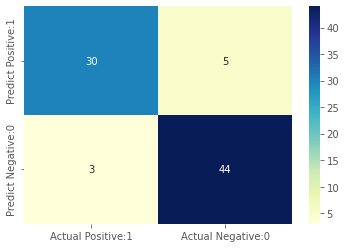

In [84]:
cm = confusion_matrix(y_test, rf_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Gradient Boosting

In [93]:
gbc_pred = gbc_model.predict(x_test)
accuracy = accuracy_score(y_test, gbc_pred)
print('predicted response: ', gbc_pred, sep='\n')
print('Testing Accuracy: ',accuracy)
print('Mean squared error: %.2f'% mean_squared_error(y_test, gbc_pred))

predicted response: 
[0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0
 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 0 1 0 1 0 0]
Testing Accuracy:  0.8414634146341463
Mean squared error: 0.16


<AxesSubplot:>

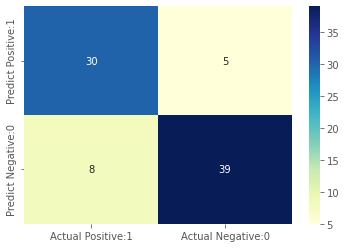

In [94]:
cm = confusion_matrix(y_test, gbc_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Kesimpulan